<a href="https://colab.research.google.com/github/Himangi-77/excelR-assignments/blob/main/ASSIGNMENT15_RANDOMFOREST_FRAUDCHECK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Use Random Forest to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [10]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

In [2]:
data = pd.read_csv('/content/Fraud_check.csv')
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


**EXPLORATORY DATA ANALYSIS**

In [3]:
data.rename(columns={'Marital.Status':'Marital_Status','Taxable.Income':'Income','City.Population':'Population','Work.Experience':'Experience'},inplace=True)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Undergrad       600 non-null    object
 1   Marital_Status  600 non-null    object
 2   Income          600 non-null    int64 
 3   Population      600 non-null    int64 
 4   Experience      600 non-null    int64 
 5   Urban           600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
data.astype({'Undergrad':'category','Marital_Status':'category','Urban':'category'})

,Undergrad,Marital_Status,Income,Population,Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [6]:
le = LabelEncoder()
data.iloc[:,0]=le.fit_transform(data.iloc[:,0])
data.iloc[:,1]=le.fit_transform(data.iloc[:,1])
data.iloc[:,-1]=le.fit_transform(data.iloc[:,-1])
data.head()

,Undergrad,Marital_Status,Income,Population,Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0


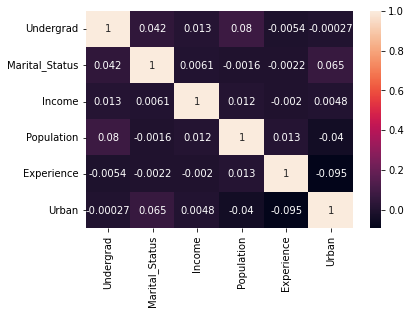

In [12]:
sns.heatmap(data.corr(),annot=True)

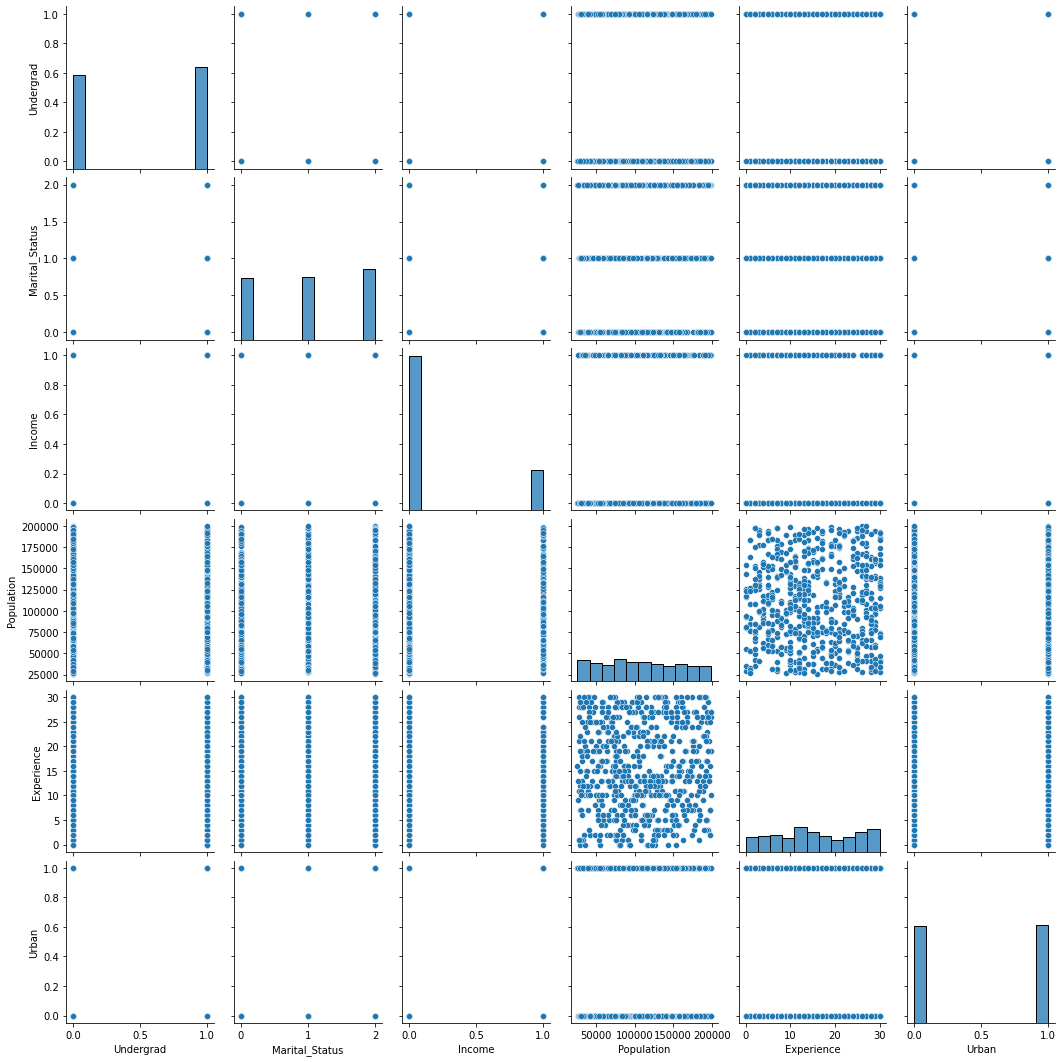

In [13]:
sns.pairplot(data=data)

**DATA PREPROCESSING**

In [7]:
data['Income'] = data['Income'].apply(lambda x: "Risky" if(x<=30000) else "Good")
data.head()

,Undergrad,Marital_Status,Income,Population,Experience,Urban
0,0,2,Good,50047,10,1
1,1,0,Good,134075,18,1
2,0,1,Good,160205,30,1
3,1,2,Good,193264,15,1
4,0,1,Good,27533,28,0


In [8]:
data['Income'] = pd.get_dummies(data['Income'],drop_first=True)
data.head() #Risky:1 Good:0

,Undergrad,Marital_Status,Income,Population,Experience,Urban
0,0,2,0,50047,10,1
1,1,0,0,134075,18,1
2,0,1,0,160205,30,1
3,1,2,0,193264,15,1
4,0,1,0,27533,28,0


**MODEL BUILDING**

In [14]:
x = data.drop(['Income'],axis=1)
y = data.iloc[:,2]

In [15]:
kfold = KFold(n_splits=10,random_state=7,shuffle=True)
model = RandomForestClassifier(n_estimators=100,max_features=3)

In [16]:
results = cross_val_score(model,x,y,cv=kfold)
print(results.mean())

0.7433333333333333


In [17]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33)

In [18]:
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [19]:
#Accuracy
metrics.accuracy_score(y_test,y_pred)

0.7272727272727273

In [20]:
pd.crosstab(y_test,y_pred)

col_0,0,1
Income,,
0,144,7
1,47,0


In [24]:
pd.DataFrame({'Actual':y_test,'Predicted':y_pred}).tail(30)

,Actual,Predicted
536,0,0
574,0,0
594,0,1
388,0,0
492,0,1
51,0,0
283,0,0
437,1,0
233,1,0
215,0,0
